<a href="https://colab.research.google.com/github/SakshiGaikwad/SakshiGaikwad/blob/main/20CO303_A_Z_Handwritting_Recognizer_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Read dataset

In [2]:
data = pd.read_csv('/content/A_Z Handwritten Data.csv').astype('float32')
data.head(10)

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Splitting data

In [3]:
X = data.drop('0',axis = 1)
y = data['0']

Performing Split Using Sklearn

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

Reshaping the Training and Testing data

In [5]:
x_train = np.reshape(x_train.values, (x_train.shape[0], 28,28))
x_test = np.reshape(x_test.values, (x_test.shape[0], 28,28))
print("Shape of Training data: ", x_train.shape)
print("Shape of Testing data: ", x_test.shape)

Shape of Training data:  (112057, 28, 28)
Shape of Testing data:  (28015, 28, 28)


 Shuffle the training data

In [6]:
shuffle_data = shuffle(x_train)

Visualize our training data

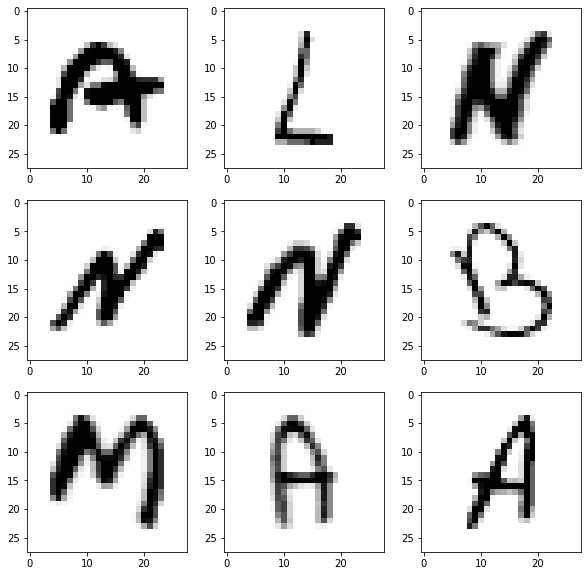

In [7]:
import cv2
fig, axes = plt.subplots(3,3, figsize = (10,10))
axes = axes.flatten()
for i in range(9):
    _, shu = cv2.threshold(shuffle_data[i], 30, 200, cv2.THRESH_BINARY)
    axes[i].imshow(np.reshape(shuffle_data[i], (28,28)), cmap="Greys")
plt.show()

Again Reshaping Data


In [8]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2],1)
print("New shape of training data: ", x_train.shape)
print("New shape of testing data: ", x_test.shape)

New shape of training data:  (112057, 28, 28, 1)
New shape of testing data:  (28015, 28, 28, 1)


 Converting to categorical

In [9]:
import tensorflow
from tensorflow.keras.utils import to_categorical
y_training = to_categorical(y_train, num_classes = 26, dtype='int')
y_testing = to_categorical(y_test, num_classes = 26, dtype='int')

Model Creation

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [11]:
model = Sequential()
 
model.add(Conv2D(64 , (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(2, 2))
 
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(2, 2))
 
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(2,2))
 
model.add(Flatten())
 
model.add(Dense(128,activation ="relu"))
model.add(Dense(256,activation ="relu"))
model.add(Dense(26,activation ="softmax"))

Model Summary

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 64)         0

Compile and Fit our model

In [13]:
model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_training, epochs=5,  validation_data = (x_test,y_testing))

Epoch 1/5
3502/3502 [==============================] - 187s 53ms/step - loss: nan - accuracy: 0.8702 - val_loss: nan - val_accuracy: 0.1006
Epoch 2/5
3502/3502 [==============================] - 183s 52ms/step - loss: nan - accuracy: 0.0986 - val_loss: nan - val_accuracy: 0.1006
Epoch 3/5
3502/3502 [==============================] - 187s 53ms/step - loss: nan - accuracy: 0.0986 - val_loss: nan - val_accuracy: 0.1006
Epoch 4/5
3502/3502 [==============================] - 183s 52ms/step - loss: nan - accuracy: 0.0986 - val_loss: nan - val_accuracy: 0.1006
Epoch 5/5
3502/3502 [==============================] - 187s 53ms/step - loss: nan - accuracy: 0.0986 - val_loss: nan - val_accuracy: 0.1006


Save the model

In [14]:
model.save(r'handwritten_character_recog_model.h5')

Creating Words Dictionary

In [15]:
words = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

Prediction Process

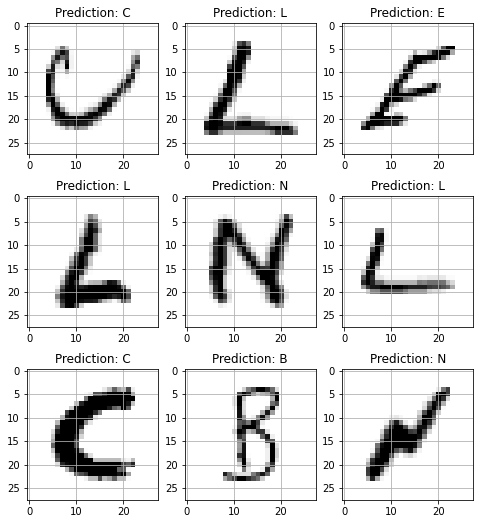

In [16]:
fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()
for i,ax in enumerate(axes):
    image = np.reshape(x_test[i], (28,28))
    ax.imshow(image, cmap="Greys")
    pred = words[np.argmax(y_testing[i])]
    ax.set_title("Prediction: "+pred)
    ax.grid()

To visualize our model on Customize image

1/1 [==============================] - 0s 104ms/step


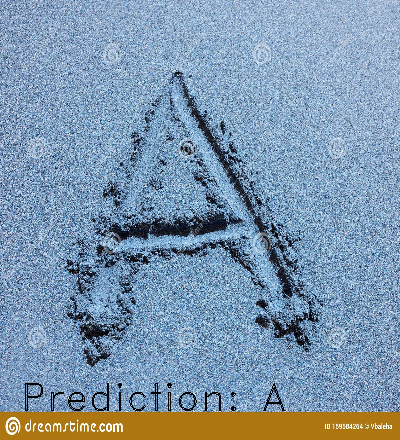

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow
from keras.models import load_model
model = load_model('handwritten_character_recog_model.h5')
 
words = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}
 
image = cv2.imread('G.jpg')
image_copy = image.copy()
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (400,440))
 
image_copy = cv2.GaussianBlur(image_copy, (7,7), 0)
gray_image = cv2.cvtColor(image_copy, cv2.COLOR_BGR2GRAY)
_, img_thresh = cv2.threshold(gray_image, 100, 255, cv2.THRESH_BINARY_INV)
 
final_image = cv2.resize(img_thresh, (28,28))
final_image =np.reshape(final_image, (1,28,28,1))
 
prediction = words[np.argmax(model.predict(final_image))]
 
cv2.putText(image, "Prediction: " + prediction, (20,410), cv2.FONT_HERSHEY_DUPLEX, 1.3, color = (0,0,0))
cv2_imshow( image)
 
while (1):
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
cv2.destroyAllWindows()